In [1]:
# mounting on Google Drive,below 2 lines helps in getting the authorization code by loggin into your Google account
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
import cv2

In [4]:
# Import PCA datastet
PCA_PATH = "/gdrive/Shareddrives/ALDA_Project/data/pca_dataset/PCs.npy"
LABELS_PATH = "/gdrive/Shareddrives/ALDA_Project/data/pca_dataset/labels.npy"
IMG_PATH = "/gdrive/Shareddrives/ALDA_Project/data/pca_dataset/images.npy"
# X as it has dataset containing PC's per image
pcs = np.load(PCA_PATH) 
# Y as it has labels for particular image
labels = np.load(LABELS_PATH) 
images = np.load(IMG_PATH) 

IMAGE_SIDE_SIZE = 128

CLASS_NAMES = ["elliptical", "spiral", "irregular", "invalid"]


In [5]:
X = np.load(IMG_PATH)
y = np.load(LABELS_PATH)
pca = np.load(PCA_PATH)

In [6]:
SVM_PATH = os.path.join("/gdrive/Shareddrives/ALDA_Project/data/Final_models", "svm_model.sav")
MLP_PATH = os.path.join("/gdrive/Shareddrives/ALDA_Project/data/Final_models", "mlp_model.h5")
CNN_PATH = os.path.join("/gdrive/Shareddrives/ALDA_Project/data/Final_models", "cnn_model.h5")
RF_PATH = os.path.join("/gdrive/Shareddrives/ALDA_Project/data/Final_models", "rf_model.sav")

In [8]:
from keras.models import load_model

cnn_model = load_model(CNN_PATH)
mlp_model = load_model(MLP_PATH)

In [9]:
import pickle

svm_model = pickle.load(open(SVM_PATH, 'rb'))
rf_model = pickle.load(open(RF_PATH, 'rb'))

In [10]:

cnn_predictions = cnn_model.predict(X)
cnn_predictions = np.argmax(cnn_predictions, axis = -1)


mlp_predictions = mlp_model.predict(X)
mlp_predictions = np.argmax(mlp_predictions, axis = -1)




In [11]:
svm_predictions = svm_model.predict(pcs)
# svm_predictions = np.argmax(svm_predictions, axis = -1)

rf_predictions = rf_model.predict(pcs)
# rf_predictions = np.argmax(rf_predictions, axis = -1)


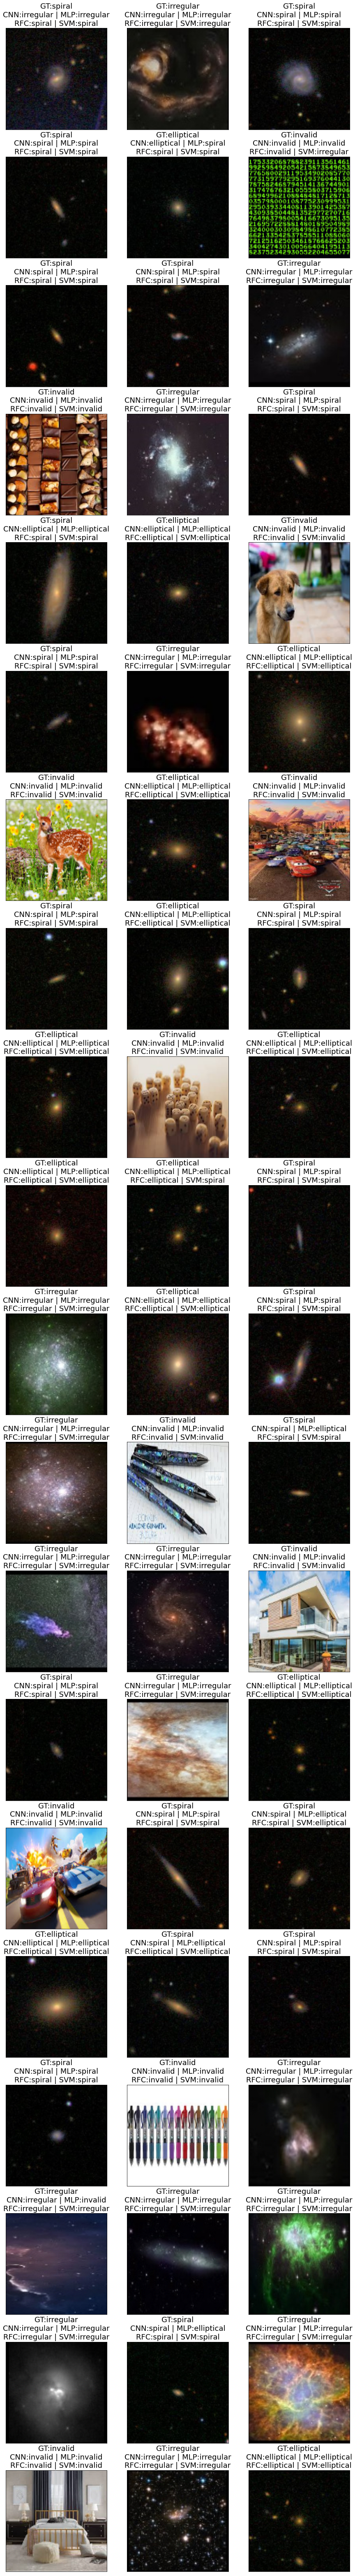

In [13]:
import random
# sample images
cols = 3
rows = 20
NO_INDICES = X.shape[0]
plt.figure(figsize=(cols*5, rows*5.7))
for i in range(rows):
  for j in range(cols):
    
    ax = plt.subplot(rows, cols, i*cols + j+1)
    indx = random.randint(0, X.shape[0]-1)

    cnn_pred = cnn_predictions[indx]
    mlp_pred = mlp_predictions[indx]

    rf_pred = rf_predictions[indx]
    svm_pred = svm_predictions[indx]

    title_string = "GT:" + str(CLASS_NAMES[y[indx]])
    title_string += "\nCNN:" + str(CLASS_NAMES[cnn_pred]) + " | MLP:" + str(CLASS_NAMES[mlp_pred])
    title_string += "\nRFC:" + str(CLASS_NAMES[rf_pred]) + " | SVM:" + str(CLASS_NAMES[svm_pred])
    

    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_title(title_string, fontdict={"fontsize": 18})
    ax.imshow(cv2.cvtColor((images[indx]*255).astype(np.uint8), cv2.COLOR_BGR2RGB))



# plt.imshow(images[2647])
# print("Actual=", df.Actual[2647])
# print("Prediction=" ,df.Predicted[2647])

In [ ]:
svm_predictions

2096